In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from imblearn import over_sampling

In [90]:
'''
Create numerical dataset with catagorical label
    - Use discretized citation count as label
    - Drop non-numeric columns
'''

# Load data
data = pd.read_csv('Data/ads_data_clean.csv')
data_SVM = data.copy()

# Create label
citation_count_label = []
for i in range(len(data)):
    row = data.iloc[i]
    label = 'LowCC' if row['citation_count'] <= -0.27 else 'LowMedCC' if  row['citation_count'] <= 0.16 else 'HighMedCC' if row['citation_count'] <= 1.03 else 'HighCC' if row['citation_count'] <= 2.25 else 'VeryHighCC' # label = 'Verylow' if row['citation_count'] < -0.5 else 'Low' if row['citation_count'] < 0 else 'Med' if row['citation_count'] < 1 else 'High' if row['citation_count'] < 2.5 else 'Veryhigh'
    citation_count_label.append(label)
data_SVM['citation_count_label'] = citation_count_label
data_SVM.drop(columns=['citation_count'], inplace=True)

# Drop non-numeric columns
data_SVM.drop(columns=['bibcode', 'doi', 'aff', 'bibstem', 'arxiv_class'], inplace=True)
data_SVM.to_csv('Data/ads_data_SVM.csv', index=False)
display(data_SVM)

,author_count,year,read_count,download_count,journal_rank,citation_count_label
0,-0.342659,0.399746,15.781133,0.691080,-0.718169,LowCC
1,0.411490,0.191319,5.439945,4.147883,-0.405034,VeryHighCC
2,-0.342659,1.025027,1.420615,-0.940852,-0.207874,LowCC
3,0.746667,-0.642389,6.174266,3.974185,-0.405034,VeryHighCC
4,-0.334280,-1.267670,3.746686,2.386458,-0.526809,VeryHighCC
...,...,...,...,...,...,...
987,-0.346849,-1.684524,-0.096406,0.183506,-0.613791,LowMedCC
988,-0.149932,-1.892951,0.557356,0.672878,-0.422430,LowMedCC
989,-0.296572,-1.892951,0.151535,0.377487,-0.439827,LowMedCC
990,-0.330090,-1.892951,0.280474,0.536624,3.312001,LowMedCC


In [92]:
'''
TTS Dataset
  - Same code as in DecTrees and NB- see figure there for oversampling
'''

# Split into X and y and train and test
X = data_SVM.drop(columns=['citation_count_label'])
y = data_SVM['citation_count_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to training set
sm = over_sampling.RandomOverSampler(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
pickle.dump([X_train, y_train, X_test, y_test], open('Data/GNB_TT', 'wb')) # Just for project requirenments 
display(X_train); display(X_test)

,author_count,year,read_count,download_count,journal_rank
0,-0.330090,-0.642389,0.490187,1.051998,-0.439827
1,-0.342659,-0.642389,0.231447,0.380607,0.806917
2,-0.233727,1.025027,-0.101806,0.090937,-0.405034
3,0.093071,1.025027,-0.771766,-0.888846,-0.207874
4,-0.200209,1.025027,-0.434626,-0.456681,-0.405034
...,...,...,...,...,...
1945,0.759236,-1.059243,3.891823,2.679769,-0.405034
1946,0.759236,-1.059243,3.891823,2.679769,-0.405034
1947,0.235522,-0.225535,1.195351,-0.092123,-0.422430
1948,3.893144,-0.642389,3.468940,2.160234,-0.248466


,author_count,year,read_count,download_count,journal_rank
213,-0.271434,-1.059243,0.929484,0.404010,-0.526809
331,-0.279813,-1.684524,1.061878,1.319306,3.312001
501,-0.183450,1.025027,-0.862044,-0.952293,-0.718169
309,0.315126,1.025027,-0.604168,-0.716708,-0.207874
88,2.590142,-0.850816,-0.137874,-0.510247,-0.509412
...,...,...,...,...,...
705,-0.237916,1.025027,-0.831375,-0.932011,3.312001
305,0.130779,0.816600,-0.503738,-0.533129,-0.207874
809,-0.346849,-1.267670,-0.409141,-0.622058,1.873897
237,-0.263055,1.025027,-0.644555,-0.613737,-0.445625


Classification report for SVM with c = 0.001:
               precision    recall  f1-score   support

       LowCC       0.50      0.08      0.14        12
    LowMedCC       0.65      0.49      0.56        41
   HighMedCC       0.84      0.94      0.89        98
      HighCC       0.56      0.66      0.61        47
  VeryHighCC       0.00      0.00      0.00         1

    accuracy                           0.72       199
   macro avg       0.51      0.43      0.44       199
weighted avg       0.71      0.72      0.70       199

Classification report for SVM with c = 0.05:
               precision    recall  f1-score   support

       LowCC       0.36      0.33      0.35        12
    LowMedCC       0.64      0.61      0.62        41
   HighMedCC       0.95      0.88      0.91        98
      HighCC       0.64      0.77      0.70        47
  VeryHighCC       0.00      0.00      0.00         1

    accuracy                           0.76       199
   macro avg       0.52      0.52     

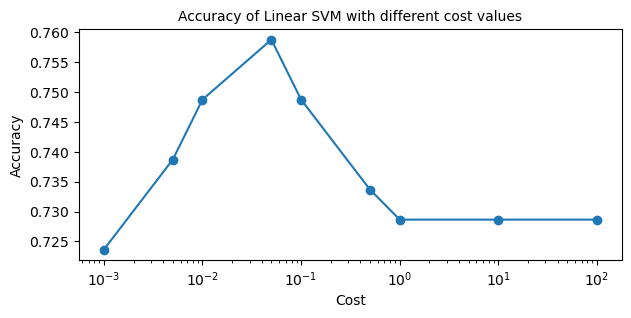

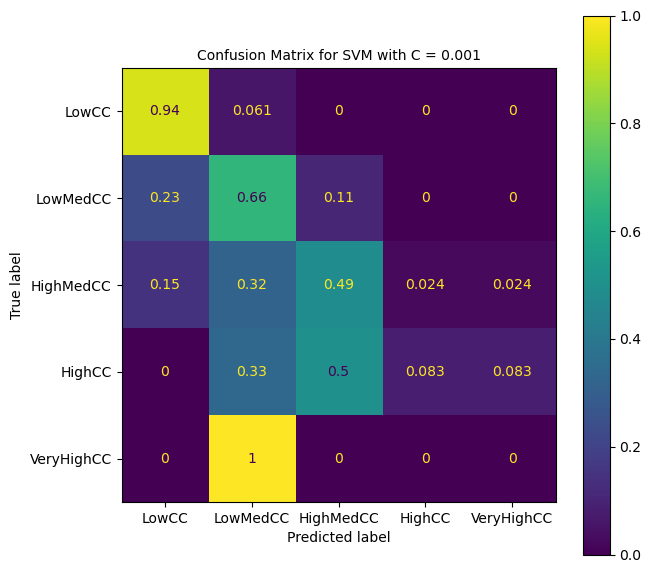

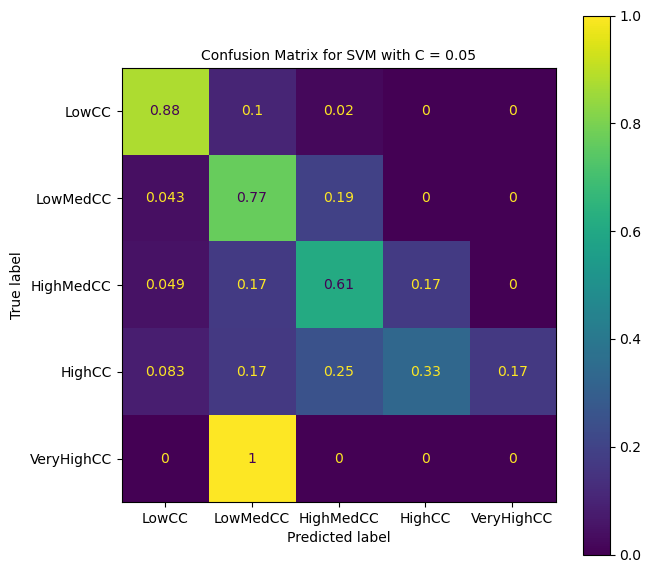

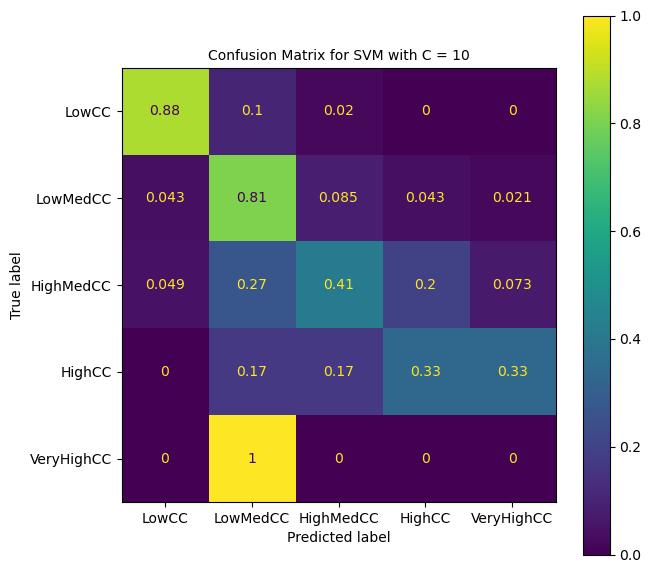

In [22]:
'''
Linear SVM
'''

Cs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]
accs = []
for C in Cs:
    SVM = svm.SVC(C=C, kernel='linear', gamma="auto")
    model = SVM.fit(X_train, y_train)
    preds = model.predict(X_test)
    accs.append(metrics.accuracy_score(y_test, preds))
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(Cs, accs, marker='o')
ax.set_xscale('log')
ax.set_xlabel('Cost', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_title('Accuracy of Linear SVM with different cost values', fontsize=10)

use_Cs = [0.001, 0.05, 10] # select 3
for C in use_Cs:
    SVM = svm.SVC(C=C, kernel='linear', gamma="auto")
    model = SVM.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'Classification report for SVM with c = {C}:\n {metrics.classification_report(y_test, preds, target_names=["LowCC", "LowMedCC", "HighMedCC", "HighCC", "VeryHighCC"])}')#{np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
    cm = metrics.confusion_matrix(y_test, preds, labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC','VeryHighCC'], normalize='true') # print(y_test.value_counts(), print(np.sum(cm, axis=1))) # check that the number of each true label is correct, just for debugging
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC', 'VeryHighCC'])
    fig, ax = plt.subplots(figsize=(7,7))
    disp.plot(ax=ax)
    ax.set_title(f'Confusion Matrix for SVM with C = {C}', fontsize=10)

Classification report for Polynomial SVM with c = 100:
               precision    recall  f1-score   support

       LowCC       0.29      0.33      0.31        12
    LowMedCC       0.68      0.41      0.52        41
   HighMedCC       0.96      0.88      0.91        98
      HighCC       0.61      0.81      0.70        47
  VeryHighCC       0.00      0.00      0.00         1

    accuracy                           0.73       199
   macro avg       0.51      0.49      0.49       199
weighted avg       0.77      0.73      0.74       199

Total Accuracy: 72.86%

Classification report for Polynomial SVM with c = 1000:
               precision    recall  f1-score   support

       LowCC       0.31      0.33      0.32        12
    LowMedCC       0.68      0.46      0.55        41
   HighMedCC       0.96      0.88      0.91        98
      HighCC       0.62      0.79      0.69        47
  VeryHighCC       0.00      0.00      0.00         1

    accuracy                           0.73     

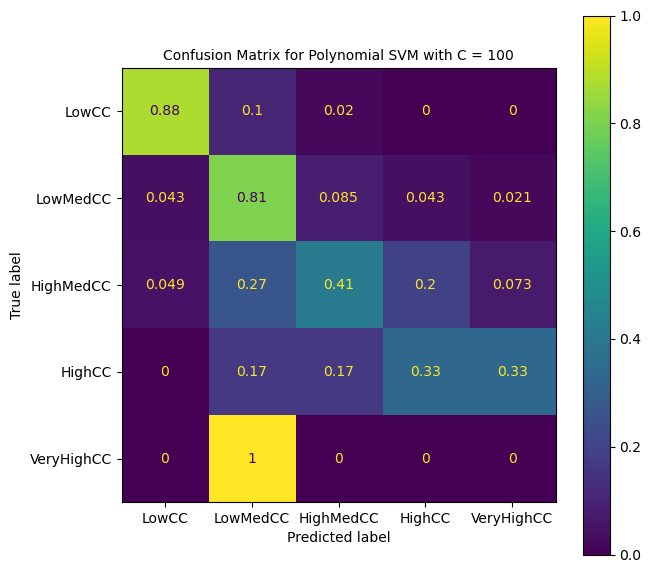

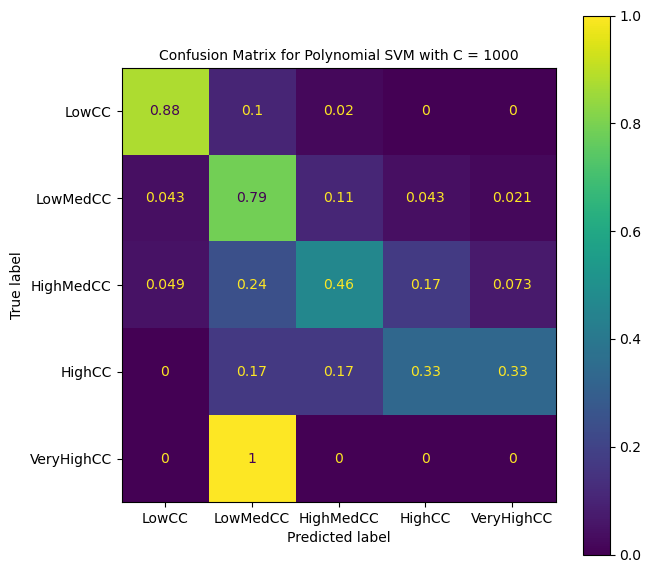

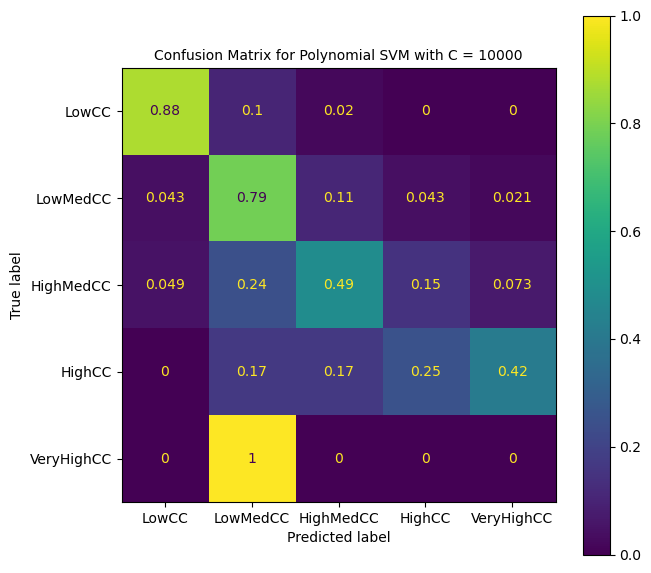

In [ ]:
'''
Polynomial SVM
'''

Cs = [0.01, 0.1, 1, 10, 100, 1000, 10000]
accs = []
for C in Cs:
    SVM = svm.SVC(C=C, kernel='poly', degree=3, gamma="auto")
    model = SVM.fit(X_train, y_train)
    preds = model.predict(X_test)
    accs.append(metrics.accuracy_score(y_test, preds))
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(Cs, accs, marker='o')
ax.set_xscale('log')
ax.set_xlabel('Cost', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_title('Accuracy of Polynomial SVM (degree=3) with different cost values', fontsize=10)

use_Cs = [100, 1000, 10000] # select 3
for C in use_Cs:
    SVM = svm.SVC(C=C, kernel='linear', degree=2, gamma="auto")
    model = SVM.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'Classification report for Polynomial SVM with c = {C}:\n {metrics.classification_report(y_test, preds, target_names=["LowCC", "LowMedCC", "HighMedCC", "HighCC", "VeryHighCC"])}')#{np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
    print(f'Total Accuracy: {np.round(metrics.accuracy_score(y_test, preds)*100,2)}%\n')
    cm = metrics.confusion_matrix(y_test, preds, labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC','VeryHighCC'], normalize='true') # print(y_test.value_counts(), print(np.sum(cm, axis=1))) # check that the number of each true label is correct, just for debugging
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC', 'VeryHighCC'])
    fig, ax = plt.subplots(figsize=(7,7))
    disp.plot(ax=ax)
    ax.set_title(f'Confusion Matrix for Polynomial SVM with C = {C}', fontsize=10)

/home/lzucker1/miniconda3/envs/general/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lzucker1/miniconda3/envs/general/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lzucker1/miniconda3/envs/general/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Classification report for RBF SVM with c = 0.01:
               precision    recall  f1-score   support

       LowCC       0.23      0.50      0.32        12
    LowMedCC       0.72      0.32      0.44        41
   HighMedCC       0.91      0.84      0.87        98
      HighCC       0.55      0.77      0.64        47
  VeryHighCC       0.00      0.00      0.00         1

    accuracy                           0.69       199
   macro avg       0.48      0.48      0.45       199
weighted avg       0.74      0.69      0.69       199

Classification report for RBF SVM with c = 1:
               precision    recall  f1-score   support

       LowCC       0.29      0.33      0.31        12
    LowMedCC       0.68      0.61      0.64        41
   HighMedCC       0.97      0.87      0.91        98
      HighCC       0.64      0.77      0.70        47
  VeryHighCC       0.00      0.00      0.00         1

    accuracy                           0.75       199
   macro avg       0.51      0.52 

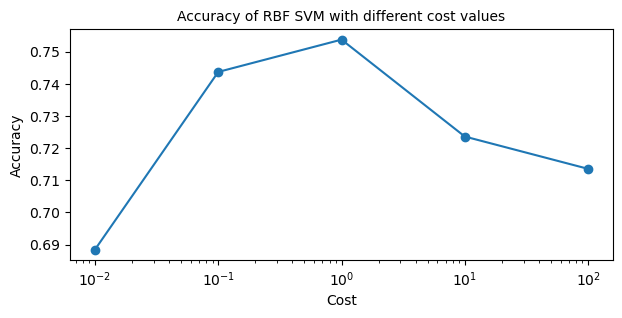

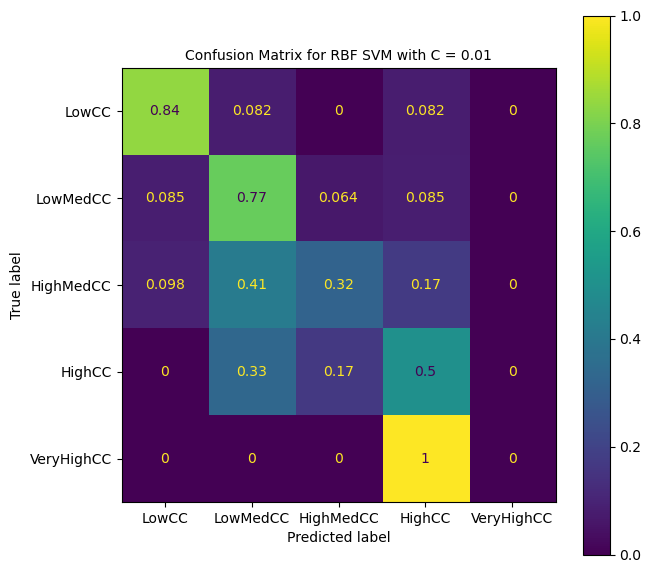

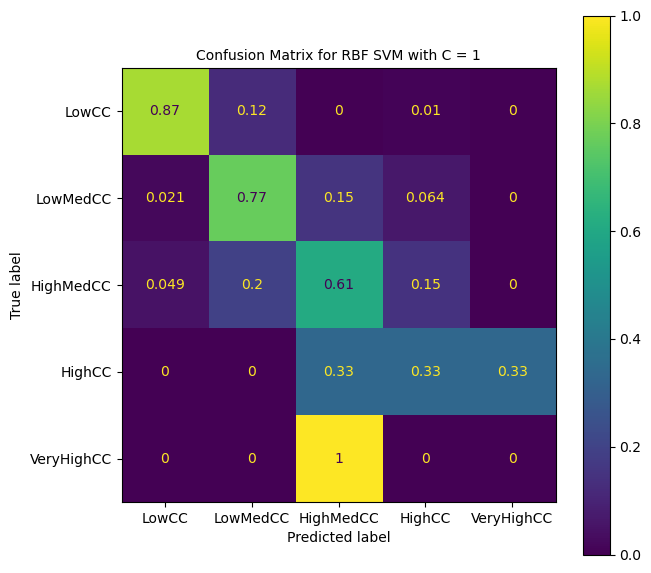

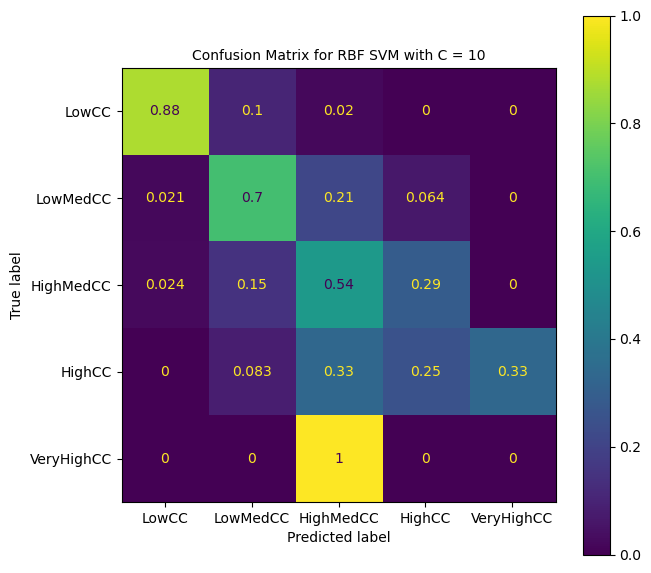

In [40]:
'''
RBF SVM
'''

Cs = [0.01, 0.1, 1, 10, 100]
accs = []
for C in Cs:
    SVM = svm.SVC(C=C, kernel='rbf', gamma="auto")
    model = SVM.fit(X_train, y_train)
    preds = model.predict(X_test)
    accs.append(metrics.accuracy_score(y_test, preds))
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(Cs, accs, marker='o')
ax.set_xscale('log')
ax.set_xlabel('Cost', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_title('Accuracy of RBF SVM with different cost values', fontsize=10)

use_Cs = [0.01, 1, 10] # select 3
for C in use_Cs:
    SVM = svm.SVC(C=C, kernel='rbf', gamma="auto")
    model = SVM.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'Classification report for RBF SVM with c = {C}:\n {metrics.classification_report(y_test, preds, target_names=["LowCC", "LowMedCC", "HighMedCC", "HighCC", "VeryHighCC"])}')#{np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
    cm = metrics.confusion_matrix(y_test, preds, labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC','VeryHighCC'], normalize='true') # print(y_test.value_counts(), print(np.sum(cm, axis=1))) # check that the number of each true label is correct, just for debugging
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC', 'VeryHighCC'])
    fig, ax = plt.subplots(figsize=(7,7))
    disp.plot(ax=ax)
    ax.set_title(f'Confusion Matrix for RBF SVM with C = {C}', fontsize=10)

In [42]:
'''
Create model comparison table
'''

d = pd.DataFrame(columns = ['Model', 'Accuracy'])
d.loc[len(d)] = {'Model': 'Linear, C=0.001', 'Accuracy': 72}
d.loc[len(d)] = {'Model': 'Linear, C=0.5', 'Accuracy': 76}
d.loc[len(d)] = {'Model': 'Linear, C=10', 'Accuracy': 73}
d.loc[len(d)] = {'Model': 'Poly, C=100', 'Accuracy': 73}
d.loc[len(d)] = {'Model': 'Poly, C=1000', 'Accuracy': 73}
d.loc[len(d)] = {'Model': 'Poly, C=10000', 'Accuracy': 73}
d.loc[len(d)] = {'Model': 'RBF, C=0.01', 'Accuracy': 69}
d.loc[len(d)] = {'Model': 'RBF, C=1', 'Accuracy': 75}
d.loc[len(d)] = {'Model': 'RBF, C=10', 'Accuracy': 72}
d = d.sort_values(by='Accuracy', ascending=False)
display(d)

,Model,Accuracy
1,"Linear, C=0.5",76
7,"RBF, C=1",75
2,"Linear, C=10",73
3,"Poly, C=100",73
4,"Poly, C=1000",73
5,"Poly, C=10000",73
0,"Linear, C=0.001",72
8,"RBF, C=10",72
6,"RBF, C=0.01",69


Accuracy for Linear SVM with C = 0.5: 70.35%


/home/lzucker1/miniconda3/envs/general/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


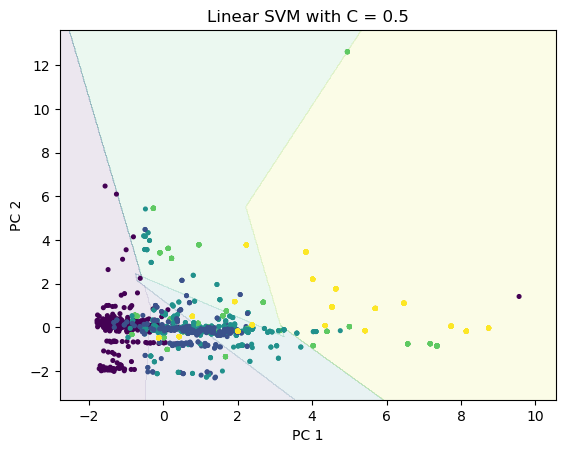

Accuracy for RBF SVM with C = 1: 68.34%


/home/lzucker1/miniconda3/envs/general/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


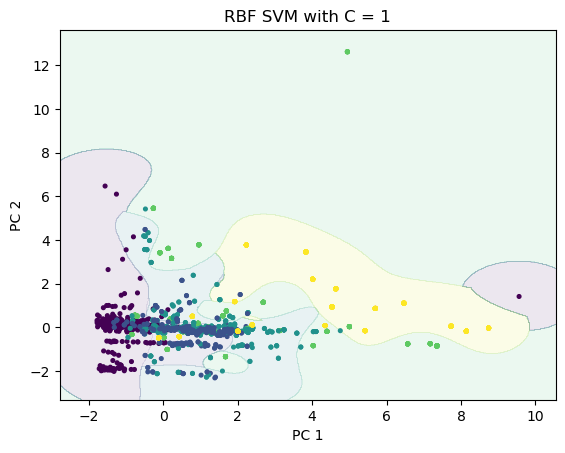

Accuracy for Linear SVM with C = 10: 70.35%


/home/lzucker1/miniconda3/envs/general/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


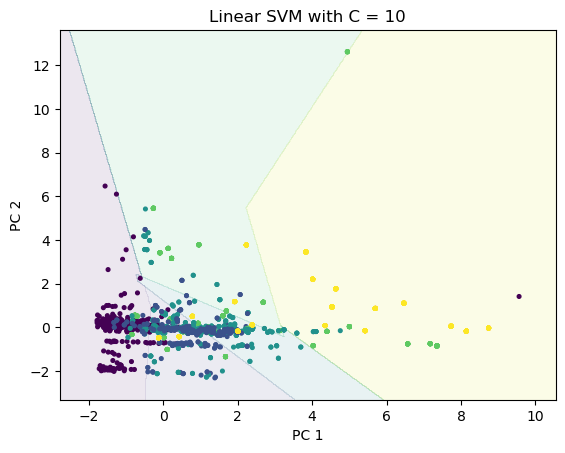

In [88]:
'''
Visualize SVM decision boundary
'''

# Create PCA-reduced dataset
from sklearn.decomposition import PCA
data_SVM = pd.read_csv('Data/ads_data_SVM.csv')
X = data_SVM.drop(columns=['citation_count_label'])
y = data_SVM['citation_count_label']
model = PCA(n_components=2) 
model.fit(X)
X_pca = model.transform(X)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
sm = over_sampling.RandomOverSampler(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train = y_train.map({'LowCC':0, 'LowMedCC':1, 'HighMedCC':2, 'HighCC':3, 'VeryHighCC':4}) # convert to numeric so that predictions can be plotted 
y_test = y_test.map({'LowCC':0, 'LowMedCC':1, 'HighMedCC':2, 'HighCC':3, 'VeryHighCC':4}) # convert to numeric so that predictions can be plotted

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title=''):
    plt.figure()
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))                
    Z_linear = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_linear = Z_linear.reshape(xx.shape)
    plt.contourf(xx, yy, Z_linear, cmap=plt.cm.viridis, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, s=7)
    plt.title('Linear SVM with C = 0.01')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()


# Train SVM model and plot decision boundary
SVM = svm.SVC(C=0.5, kernel='linear', gamma="auto")
model = SVM.fit(X_train, y_train) 
preds = model.predict(X_test)
print(f'Accuracy for Linear SVM with C = 0.5: {np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
plot_decision_boundary(np.array(X_train), y_train, model, title='Linear SVM with C = 0.5') 

# Train SVM model and plot decision boundary
SVM = svm.SVC(C=1, kernel='rbf', gamma="auto")
model = SVM.fit(X_train, y_train) 
preds = model.predict(X_test)
print(f'Accuracy for RBF SVM with C = 1: {np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
plot_decision_boundary(np.array(X_train), y_train, model , title='RBF SVM with C = 1') 

# Train SVM model and plot decision boundary
SVM = svm.SVC(C=10, kernel='linear', gamma="auto")
model = SVM.fit(X_train, y_train) 
preds = model.predict(X_test)
print(f'Accuracy for Linear SVM with C = 10: {np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
plot_decision_boundary(np.array(X_train), y_train, model, title='Linear SVM with C = 10') 



#### Ensemble SVM

In [ ]:

SVM = svm.SVC(C=0.5, kernel='linear', gamma="auto")
BC = BaggingClassifier(estimator=SVM(), n_estimators=10, random_state=0)
model = BC.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Classification report for SVM with c = {C}:\n {metrics.classification_report(y_test, preds, target_names=["LowCC", "LowMedCC", "HighMedCC", "HighCC", "VeryHighCC"])}')#{np.round(metrics.accuracy_score(y_test, preds)*100,2)}%')
cm = metrics.confusion_matrix(y_test, preds, labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC','VeryHighCC'], normalize='true') # print(y_test.value_counts(), print(np.sum(cm, axis=1))) # check that the number of each true label is correct, just for debugging
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LowCC', 'LowMedCC', 'HighMedCC', 'HighCC', 'VeryHighCC'])

In [56]:
EA = - (2/5) * math.log2(2/5) - (2/5) * math.log2(2/5) -(1/5) * math.log2(1/5)
EC = -(1) * math.log2(1) 
EB = -(2/3) * math.log2(2/3) - (1/3) * math.log2(1/3)
print(f'EA: {EA} \nEC: {EC} \nEB: {EB}')
InfoGain = EA - ((2/5) * EC + (3/5) * EB)
print(InfoGain)

EA: 1.5219280948873621 
EC: -0.0 
EB: 0.9182958340544896
0.9709505944546685
